# Data Visualization Workshop
#### Sports Analytics Group
#### 2024-01-24

## Introduction

This workshop will preview some basic data visualization techniques in R using the ggplot2 library and assumes some prior knowledge and experience with the tidyverse library. For more extensive notes on data manipulation, see [here](https://github.com/jeremydumalig/Sports-Analytics-Group).

## Brief Review of Data Manipulation using `pandas`

Load package and data (this dataset and others can be found [here](https://github.com/jeremydumalig/Sports-Analytics-Group)).

In [48]:
import pandas as pd

nba = pd.read_csv("nba23.csv")

In [49]:
nba['MIN'] = nba['MP'] / nba['G']
nba['AST/TO'] = nba['AST'] / nba['TOV']

denver = nba[(nba.Tm == "DEN") & (nba.MIN >= 10)]
denver = denver.sort_values(by='AST/TO', ascending=False)
denver = denver[['Player', 'Pos', 'AST', 'TOV', 'AST/TO']]

denver.head(5)

,Player,Pos,AST,TOV,AST/TO
443,Jamal Murray,PG,400,145,2.758621
318,Nikola Jokić,C,678,247,2.744939
305,Reggie Jackson,PG,50,19,2.631579
83,Bruce Brown,SF,268,123,2.178862
105,Vlatko Čančar,PF,80,37,2.162162


In [79]:
teams = nba.groupby('Tm').agg({'3P': 'sum', '3PA': 'sum'})
teams['3P%'] = 100 * teams['3P'] / teams['3PA']

teams = teams.reset_index()
teams = teams.sort_values('3P%', ascending=True)

teams.head(5)

,Tm,3P,3PA,3P%
10,HOU,856,2619,32.684231
4,CHO,881,2669,33.008617
27,TOR,880,2626,33.511043
15,MIA,980,2852,34.361851
26,SAS,911,2640,34.507576


## Data Visualization using `matplotlib`

Documentation for plotting in `matplotlib` found [here](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='PTS', ylabel='FG%'>

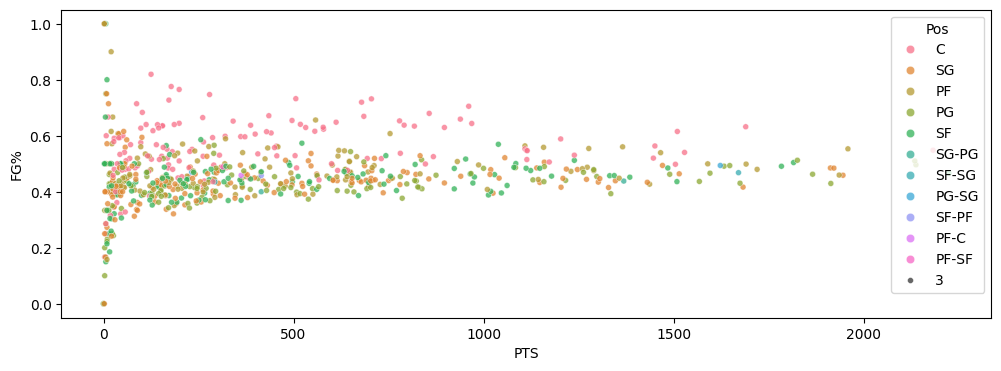

In [52]:
nba['FG%'] = nba['FG'] / nba['FGA']

plt.figure(figsize=(12, 4))

sns.scatterplot(data=nba, x='PTS', y='FG%', hue='Pos', size=3, alpha=0.75)

Text(0.5, 1.0, 'Distribution of Player 3PM in the 2022-23 NBA Season')

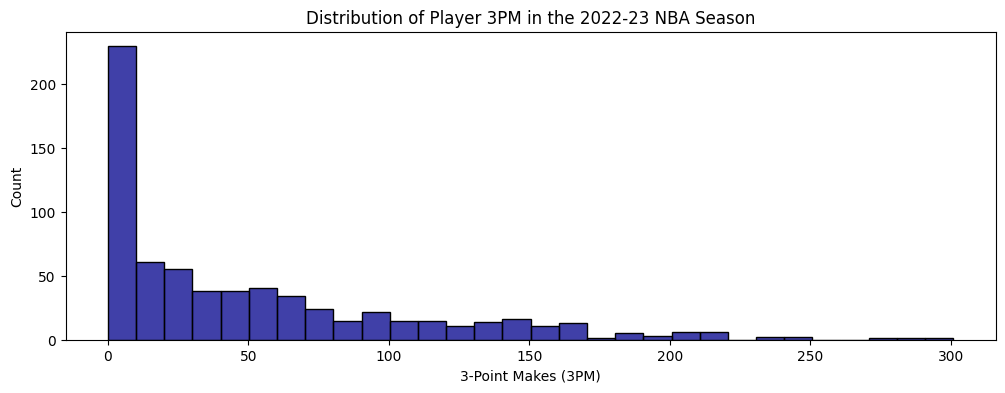

In [64]:
plt.figure(figsize=(12, 4))

sns.histplot(data=nba, x='3P', color='darkblue', bins=30)

plt.xlabel('3-Point Makes (3PM)')
plt.ylabel('Count')
plt.title('Distribution of Player 3PM in the 2022-23 NBA Season')

(0.0, 50.0)

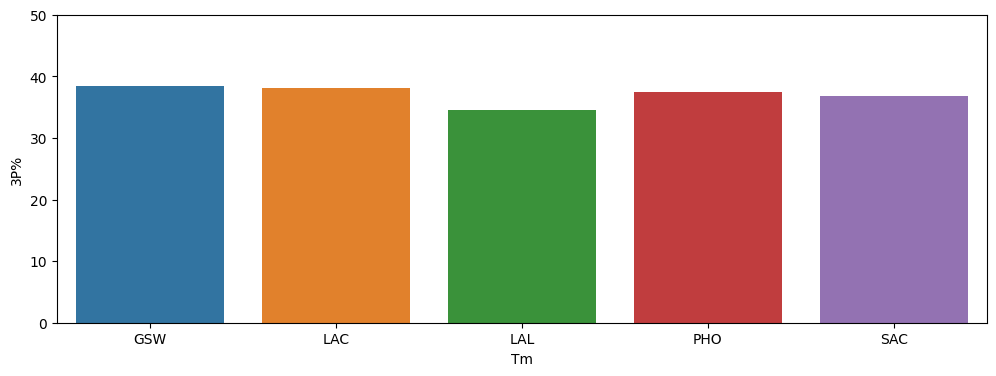

In [63]:
pacific_division = nba[(nba.Tm.isin(["GSW", "LAL", "LAC", "SAC", "PHO"]))]

pacific_division = pacific_division.groupby('Tm').agg({'3P': 'sum', '3PA': 'sum'})
pacific_division['3P%'] = 100 * pacific_division['3P'] / pacific_division['3PA']

plt.figure(figsize=(12, 4))

sns.barplot(data=pacific_division, x='Tm', y='3P%', hue='Tm')

plt.ylim(0, 50)